In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
from PIL import Image as img
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import folium
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
from scipy import stats

In [14]:
df_crimes = pd.read_csv(r'C:\Users\Maher notebook\Downloads\dataset\london_crime_by_lsoa.csv', dtype={'year':str, 'month':str})
print("Dataset read into pandas dataframe!")

Dataset read into pandas dataframe!


In [15]:
df_crimes.sample(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
11129962,E01003082,Lambeth,Violence Against the Person,Wounding/GBH,0,2009,4
5089478,E01000286,Barnet,Drugs,Drug Trafficking,0,2009,7
8529101,E01004451,Waltham Forest,Robbery,Business Property,0,2009,3
7055430,E01001297,Ealing,Other Notifiable Offences,Going Equipped,0,2013,1
7455661,E01004666,Westminster,Other Notifiable Offences,Going Equipped,0,2009,12
6938526,E01002039,Haringey,Criminal Damage,Criminal Damage To Motor Vehicle,1,2014,8
10469024,E01002445,Hillingdon,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2016,10
6331246,E01001568,Enfield,Drugs,Possession Of Drugs,0,2013,7
12146482,E01002493,Hillingdon,Theft and Handling,Handling Stolen Goods,0,2009,5
6508804,E01000501,Brent,Robbery,Personal Property,0,2008,10


In [9]:
df_crimes.dtypes

lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year              object
month             object
dtype: object

In [10]:
df_crimes.describe(include= 'O').transpose()

,count,unique,top,freq
lsoa_code,13490604,4835,E01003689,3456
borough,13490604,33,Croydon,602100
major_category,13490604,9,Theft and Handling,3966300
minor_category,13490604,32,Common Assault,522180
year,13490604,9,2016,1498956
month,13490604,12,11,1124217


In [23]:
df_crimes['year'].unique()

array(['2016', '2015', '2008', '2012', '2010', '2013', '2014', '2011',
       '2009'], dtype=object)

In [24]:
summary_num= df_crimes.describe(include=np.number)
summary_num

,value
count,1.349060e+07
mean,4.779444e-01
std,1.771513e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.000000e+00
max,3.090000e+02


In [25]:
print('MIN: {}, MAX: {}, UNIQUE_VALUES: {}, MODE: {}'.format(
    df_crimes['value'].min(),
    df_crimes['value'].max(),
    df_crimes['value'].nunique(),
    stats.mode(df_crimes['value'])
))

MIN: 0, MAX: 309, UNIQUE_VALUES: 247, MODE: ModeResult(mode=0, count=10071505)


In [26]:
df_major_category= df_crimes.groupby('major_category', axis=0).sum()
df_major_category

C:\Users\Maher notebook\AppData\Local\Temp\ipykernel_3176\1068688500.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_major_category= df_crimes.groupby('major_category', axis=0).sum()


,value
major_category,
Burglary,754293
Criminal Damage,630938
Drugs,470765
Fraud or Forgery,5325
Other Notifiable Offences,106349
Robbery,258873
Sexual Offences,1273
Theft and Handling,2661861
Violence Against the Person,1558081


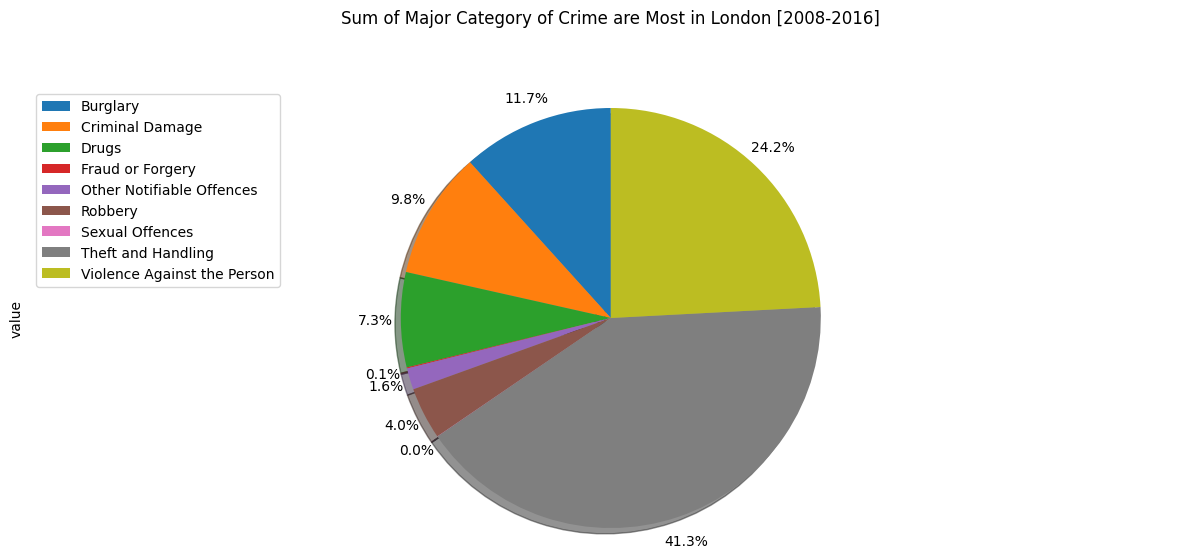

In [27]:
df_major_category['value'].plot(kind='pie',
                           figsize = (15,6),
                           autopct= '%1.1f%%',
                           startangle=90,
                           shadow=True,
                           labels=None,
                           pctdistance= 1.12,

                        )
plt.title("Sum of Major Category of Crime are Most in London [2008-2016]", y=1.12)
plt.axis('equal')
plt.legend(labels=df_major_category.index, loc='upper left')
plt.show()


In [28]:
major_ctg= df_crimes.major_category.value_counts()
major_ctg

Theft and Handling             3966300
Violence Against the Person    3171744
Criminal Damage                2069172
Drugs                          1179468
Burglary                       1043604
Robbery                         939384
Other Notifiable Offences       776304
Fraud or Forgery                236520
Sexual Offences                 108108
Name: major_category, dtype: int64

<Axes: title={'center': 'Sum of Crimes at Major Category in London from 2008-2016'}>

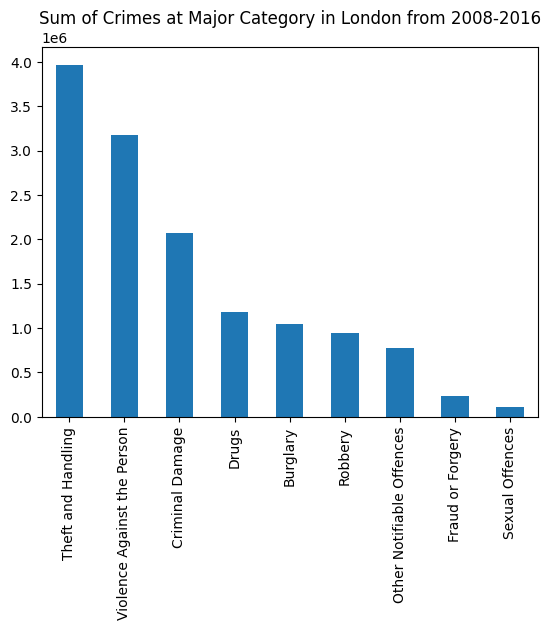

In [29]:
major_ctg.plot.bar(title = "Sum of Crimes at Major Category in London from 2008-2016", fontsize=10)

In [30]:
minor_ctg= df_crimes.minor_category.value_counts(ascending=False)
minor_ctg

Common Assault                            522180
Theft From Motor Vehicle                  522180
Other Theft                               522180
Burglary in Other Buildings               522072
Theft/Taking Of Motor Vehicle             522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

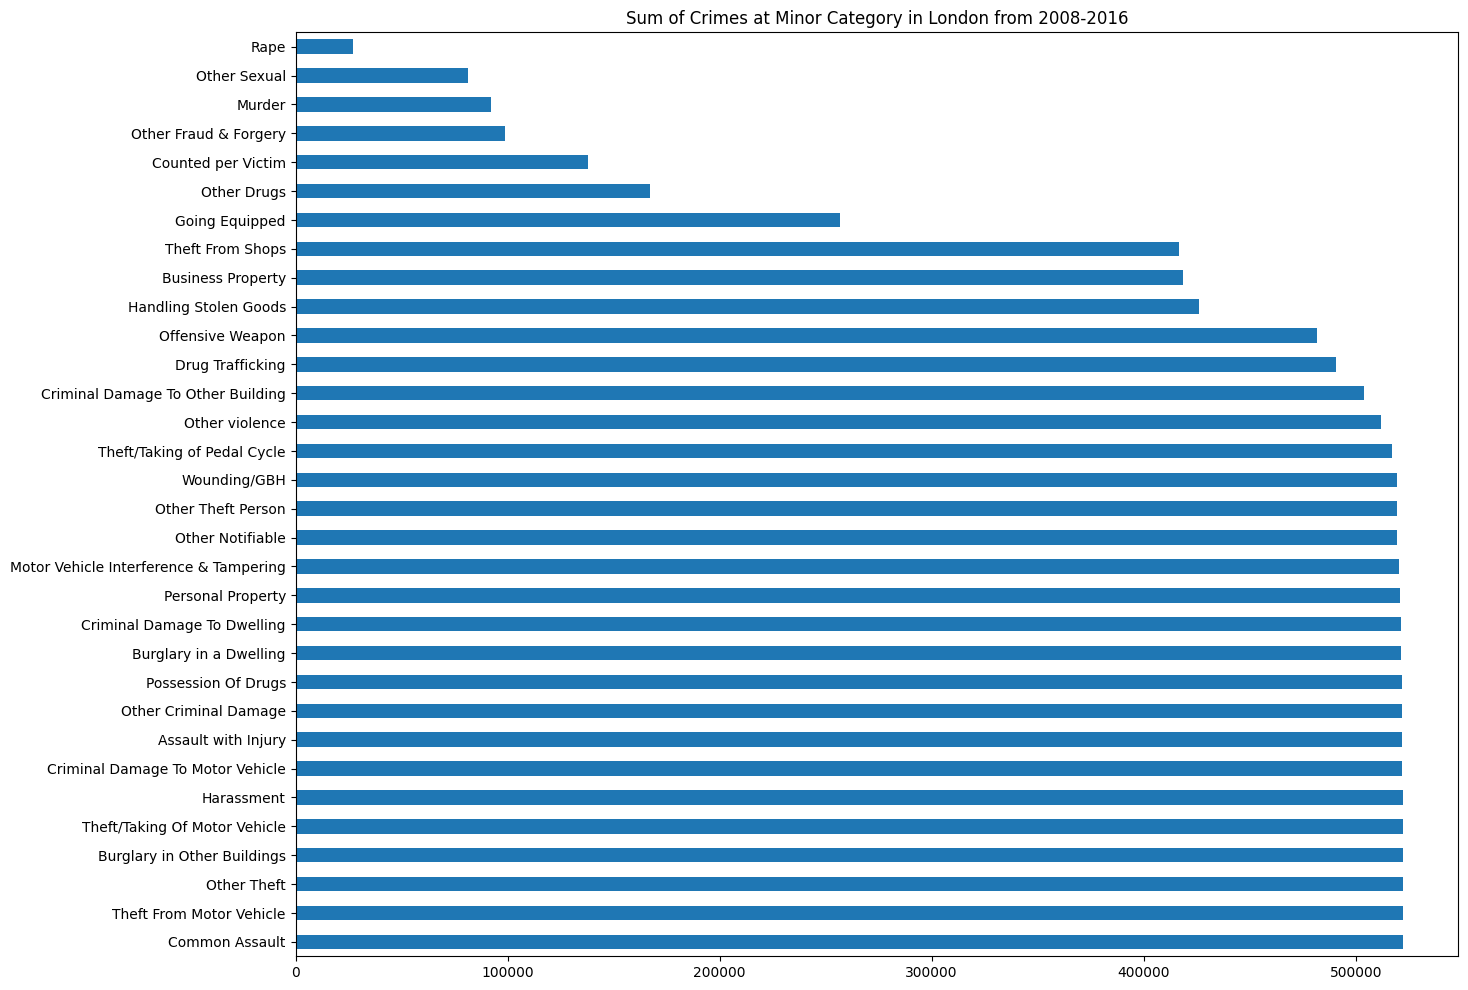

In [38]:
# Plot grafik batang horizontal
df_crimes['minor_category'].value_counts().plot.barh(figsize=(15, 12),
                                                    title="Sum of Crimes at Minor Category in London from 2008-2016")
plt.show()

In [ ]:
crimesPerYear, crimesPerMonth= {},{}
# months = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec']
months=['1','2','3','4','5','6','7','8','9','10','11','12']

for year in np.sort(df_crimes['year'].unique()):
    crimesY=df_crimes.loc[(df_crimes['year']==year)]
    crimesPerYear[year]=sum(crimesY['value'])
    crimesPerMonth[year]=[]
    
    for month in months:
        crimesM= crimesY.loc[crimesY['month']==month]
        crimesPerMonth[year].append(sum(crimesM['value']))
        
valSort= list(crimesPerYear.values())
valSort.sort()
cpmMatrix = np.mean([crimesPerMonth[key] for key in crimesPerYear.keys()], axis=0)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(len(crimesPerYear.keys())), list(crimesPerYear.values()),
        linewidth= 2, color='red', marker='o', markersize=7.0)
plt.annotate(valSort[-1], (0.2, valSort[-1] - 1500))
plt.annotate(valSort[-2], (4.1, valSort[-2]))
plt.annotate(valSort[-3], (7., valSort[-3]))
plt.annotate(valSort[-4], (7.2, valSort[-7]-700))

plt.xticks(range(len(crimesPerYear.keys())), crimesPerYear.keys())
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')
plt.grid()

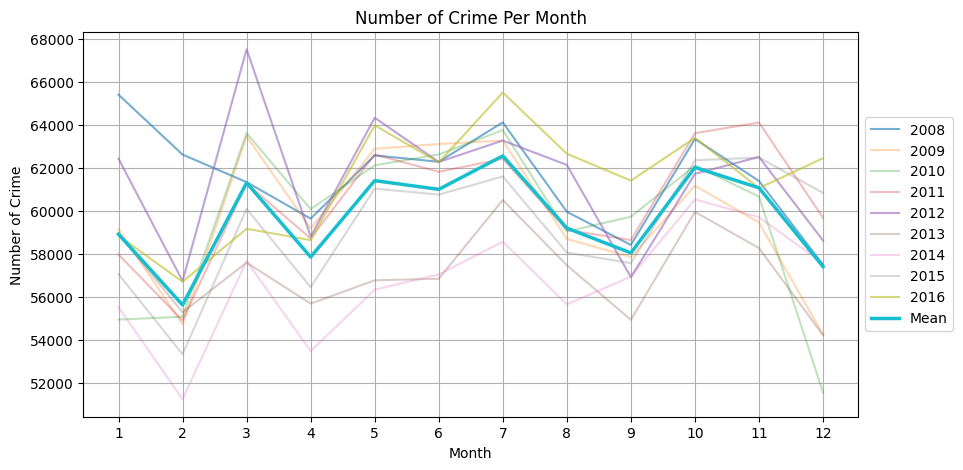

In [45]:
plt.figure(figsize=(10,5))

for year in crimesPerMonth.keys():
    if int(year) in [2008,2012,2016]:
        plt.plot(range(len(crimesPerMonth[year])), crimesPerMonth[year], label=year, alpha=0.6)
    else:
        plt.plot(range(len(crimesPerMonth[year])), crimesPerMonth[year], label=year, alpha=0.3)
plt.plot(range(12), cpmMatrix, label='Mean', linewidth=2.5)
plt.xticks(range(len(df_crimes['month'].unique())), months)
plt.xlabel("Month")
plt.ylabel("Number of Crime")
plt.title("Number of Crime Per Month")
plt.grid()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [46]:
year_2014= df_crimes.loc[df_crimes['year']=='2014']
months = year_2014['month'].unique()
months.sort()

sum_months= year_2014.groupby(['month']).sum()
total= sum_months['value'].to_numpy()
name_of_month= ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Okt','Nov','Dec']
print("Number of Crime in each month in the year 2014")
print(name_of_month)
print(total)
n= np.arange(len(months))
x_range= range(1,13)

Number of Crime in each month in the year 2014
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dec']
[55515 60537 59704 57565 51222 57669 53467 56327 57039 58564 55641 56933]


C:\Users\Maher notebook\AppData\Local\Temp\ipykernel_3176\880719784.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_months= year_2014.groupby(['month']).sum()


C:\Users\Maher notebook\AppData\Local\Temp\ipykernel_3176\2561107258.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_range, total, s=50, c='red',cmap='varidis',alpha=1)


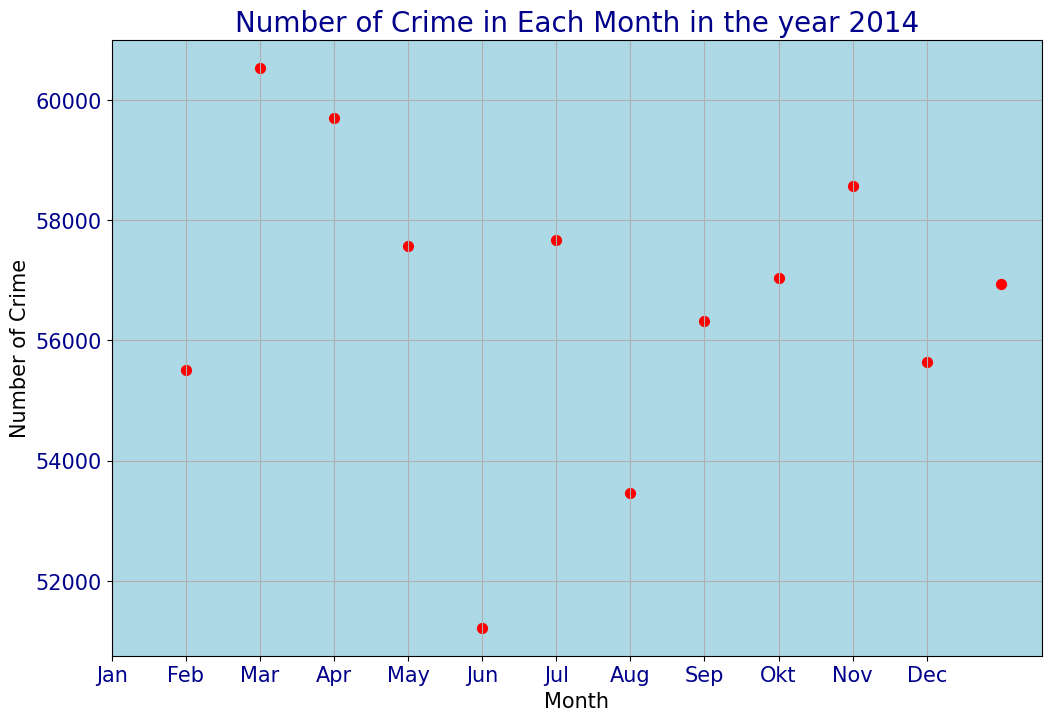

In [47]:
plt.figure(figsize=(12,8))
ax= plt.axes()
ax.set_facecolor('lightblue')
plt.scatter(x_range, total, s=50, c='red',cmap='varidis',alpha=1)
plt.title("Number of Crime in Each Month in the year 2014", color= 'darkblue', fontsize=20)
plt.xlabel("Month", fontsize=15)
plt.ylabel("Number of Crime", fontsize=15)
plt.xticks(n, name_of_month)
plt.xticks(color='darkblue', fontsize=15)
plt.yticks(color='darkblue', fontsize=15)
plt.grid()

In [ ]:
df_crimes_val = df_crimes.loc[df_crimes['value'] != 0]
df_crimes_val.describe(include='object')